# Vecinos más cercanos
En este problema se tiene un conjunto de datos bidimensionales que representan dos categorías `r` y `g` y un nuevo conjunto de datos en el que no se conoce la categoría.

In [1]:
%pylab
%matplotlib inline

%config InlineBackend.figure_format = 'retina'

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [2]:
data = np.array([[1, 1], [1.5, 0.95], [1.5, 1.75], [1.9, 2], [2.2, 1.8], [2.5, 2.2]])
target =  np.array(['r', 'r', 'r', 'g', 'g', 'g'])

newData = np.array([[0.8, 1.5], [2.3, 2.8], [2, 2]])

El problema es encontrar las categorías a las que pertenecen los nuevos puntos, en la gráfica los de color negro.

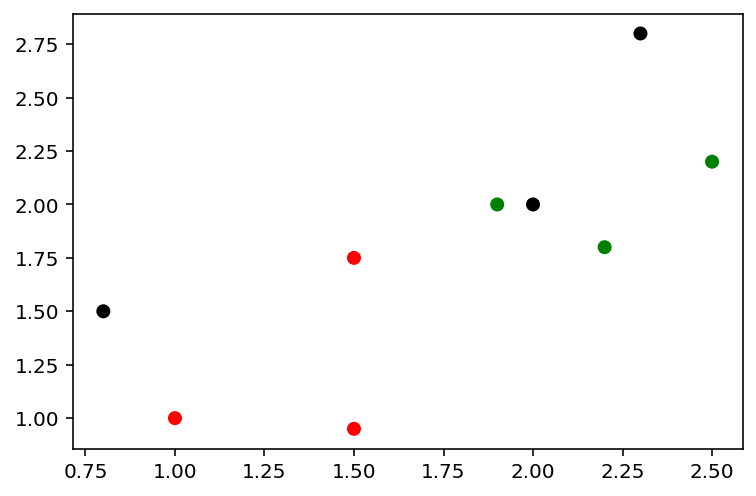

In [3]:
X = np.vstack([data, newData])
col = np.concatenate([target, np.array(['k', 'k', 'k'])])

scatter(X[:, 0], X[:, 1], color = col)

##  RadiusNeighborsClassifier

Para esto se puede utilizar el clasificador `RadiusNeighborsClassifier`

In [4]:
from sklearn.neighbors import RadiusNeighborsClassifier

# Creamos el modelo sin entrenar:
model = RadiusNeighborsClassifier(radius = 1)

# Entrenamos el modelo:
model.fit(data, target)

# Predecimos la clase para tres puntos diferentes:
prediction = model.predict(newData)

print(prediction)

['r' 'g' 'g']


Se puede representar los valores y comprobar que las categorías se han asignado correctamente.

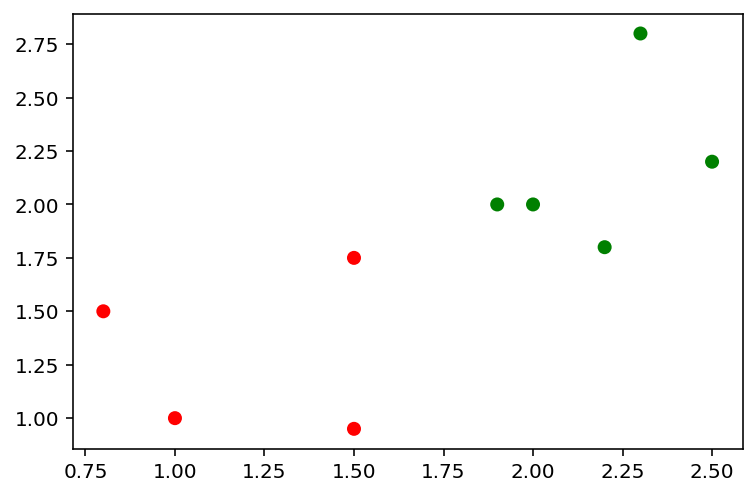

In [5]:
col = np.concatenate([target, prediction])
scatter(X[:, 0], X[:, 1], color = col)

## KNeighborsClassifier
El ejmeplo anterior se puede repetir utlizando el clasificador `KNeighborsClassifier` y comprobar la predicción que ofrece este.

In [6]:
from sklearn.neighbors import KNeighborsClassifier

# Creamos el modelo sin entrenar:
model = KNeighborsClassifier(n_neighbors = 3)

# Entrenamos el modelo:
model.fit(data, target)

# Predecimos la clase para tres puntos diferentes:
prediction = model.predict(newData)

print(prediction)

['r' 'g' 'g']


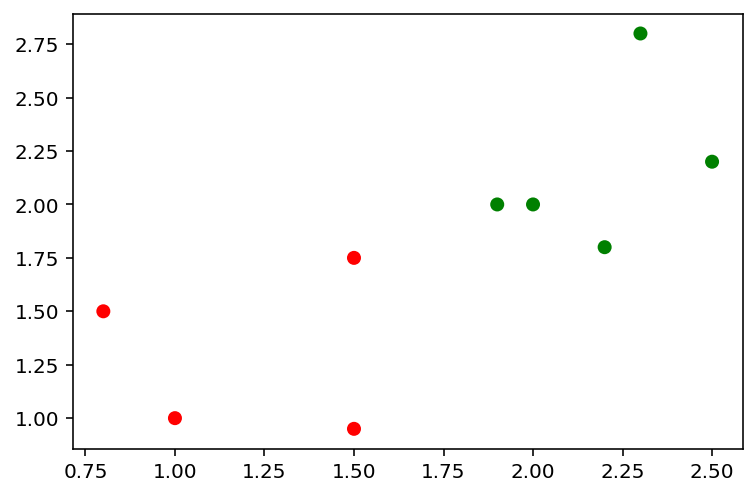

In [7]:
col = np.concatenate([target, prediction])
scatter(X[:, 0], X[:, 1], color = col)

## Aplicación al conjunto de datos de Iris
El conjunto de datos Iris contiene 50 muestras de tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor) en las que se midieron cuatro rasgos de cada muestra: el largo y el ancho de los sépalos y pétalos. Es un conjunto de datos muy utilizado para la construcción de modelos de ejemplo, encontrándose disponible en scikit-learn. La importación de los datos se realiza utilizando la función `load_iris` que se encuentra disponible en el conjunto de datos de ejemplo de scikit-learn (`sklearn.datasets`).

In [8]:
from sklearn.datasets import load_iris

iris = load_iris()

# Para facilitar solamente se utilizan las dos primeras celdas
X = iris.data[:, 0:2]
y = iris.target

### KNeighborsClassifier
En una prueba inicial se puede utilizar el algoritmo `KNeighborsClassifier` fijando el número de vecinos a 5.

In [9]:
knn = KNeighborsClassifier(5)
knn.fit(X, y)

KNeighborsClassifier()

Una opción para visualizar la predicción es representar en un plano los dos valores utilizados para realizar la clasificación y representar las predicciones en cada punto con un color diferente

(1.0, 5.350000000000004)

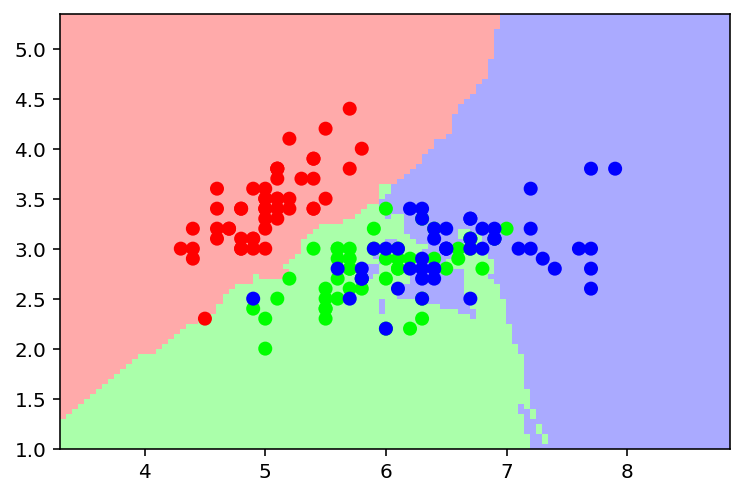

In [10]:
from matplotlib.colors import ListedColormap

# Version clara y oscura de los coloes
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Creación de un conjunto de datos para 
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

pcolormesh(xx, yy, Z, cmap = cmap_light)
scatter(X[:, 0], X[:, 1], c=y, cmap = cmap_bold)
xlim(xx.min(), xx.max())
ylim(yy.min(), yy.max())

Al amentar el número de vecinos utilizados para realizar la clasificación se 5 a 15 se puede observar que las fronteras se suavizan

(1.0, 5.350000000000004)

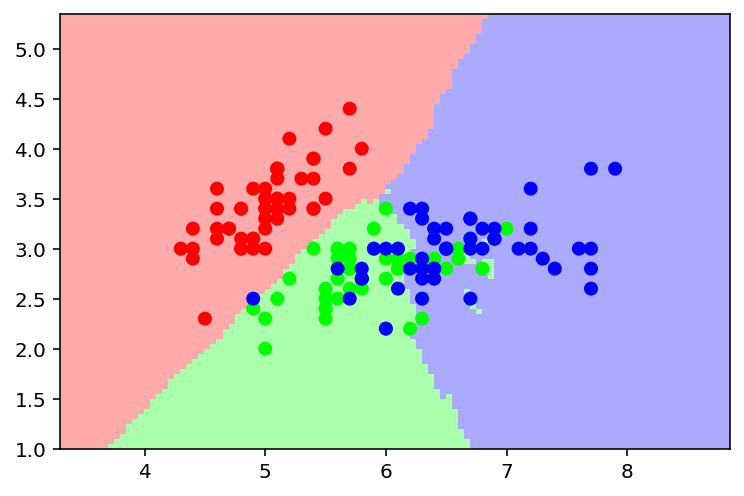

In [11]:
knn = KNeighborsClassifier(15)
knn.fit(X, y)

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

pcolormesh(xx, yy, Z, cmap = cmap_light)
scatter(X[:, 0], X[:, 1], c=y, cmap = cmap_bold)
xlim(xx.min(), xx.max())
ylim(yy.min(), yy.max())

### RadiusNeighborsClassifier
El análisis se puede repetir utilizando `RadiusNeighborsClassifier`. En esta ocasión hay que tener en cuenta que es necesario dar un asignar un valor para los puntos en los que no existe un dato en el radio indicado, para su representación se ha de añadir un nuevo color a `cmap_light` que puede ser un gris como `'#AAAAAA'`.

In [12]:
from sklearn.neighbors import RadiusNeighborsClassifier

knn = RadiusNeighborsClassifier(0.3, outlier_label = 3)
knn.fit(X, y)

RadiusNeighborsClassifier(outlier_label=3, radius=0.3)

/Users/daniel/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:568: UserWarning: Outlier label 3 is not in training classes. All class probabilities of outliers will be assigned with 0.
  warnings.warn('Outlier label {} is not in training '


(3.3, 8.84999999999998)

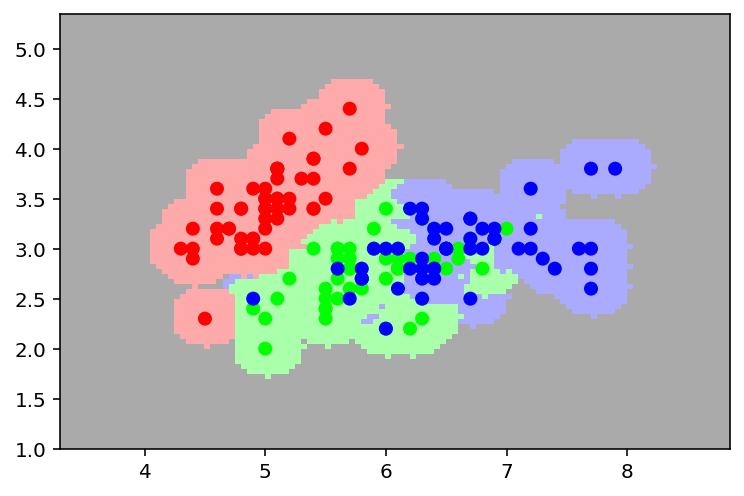

In [13]:
from matplotlib.colors import ListedColormap

# Version clara y oscura de los coloes
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#AAAAAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Creación de un conjunto de datos para 
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

pcolormesh(xx, yy, Z, cmap = cmap_light)
scatter(X[:, 0], X[:, 1], c=y, cmap = cmap_bold)
xlim(xx.min(), xx.max())

Este problema se puede factorizar de cara a poder repetir el análisis con otros conjuntos de datos. También se pueden ignorar las advertencias debidas a la existencia de outliers en los datos.

In [14]:
import warnings
warnings.filterwarnings('ignore')

def modelRadius(X, y, r):
    # Creación del modelo
    knn = RadiusNeighborsClassifier(r, outlier_label = 3)
    knn.fit(X, y)

    # Version clara y oscura de los coloes
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#AAAAAA'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    # Creación de un conjunto de datos para 
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                         np.arange(y_min, y_max, 0.05))

    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    pcolormesh(xx, yy, Z, cmap = cmap_light)
    scatter(X[:, 0], X[:, 1], c=y, cmap = cmap_bold)
    xlim(xx.min(), xx.max())
    ylim(yy.min(), yy.max())

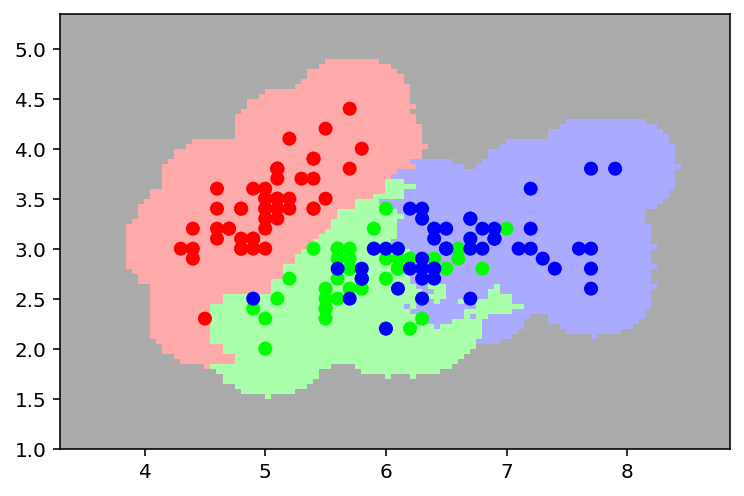

In [15]:
modelRadius(X, y, 0.5)

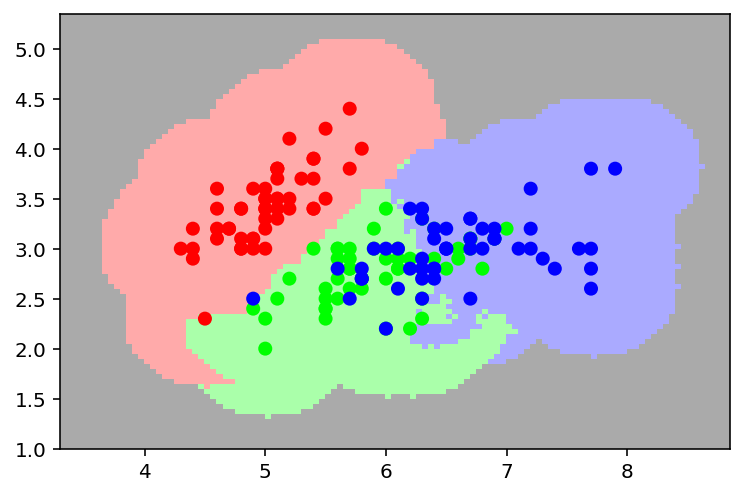

In [16]:
modelRadius(X, y, 0.7)

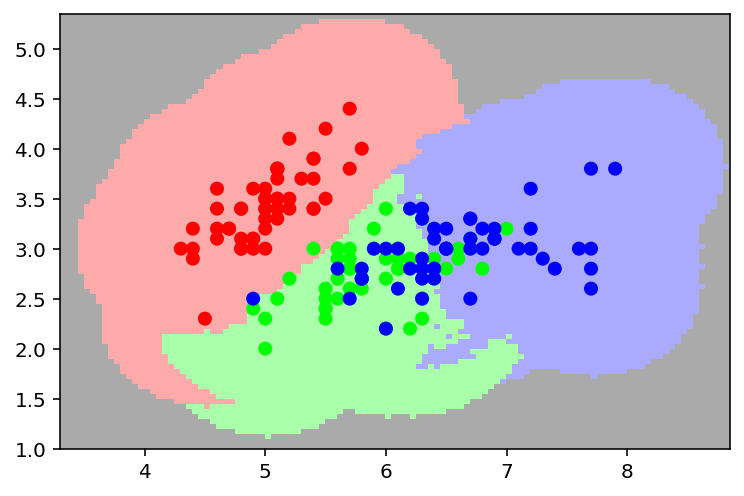

In [17]:
modelRadius(X, y, 0.9)